# Simple Opaque WDM Simulator with Anycast Service Requests

File that reads the binary file with the complete set of results from the simulation and plots the final results.

In [1]:
import os
import pickle
import time

import plots
import core
import graph

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
# gets the latest results
last_folder = os.listdir("./results/data")[-1]
with open(f"./results/data/20230304T043804.301920UTC/final_results.h5", "rb") as file:
    data = pickle.load(file)
    print(data.keys())

dict_keys(['args', 'env', 'results', 'routing_policies', 'restoration_policies', 'loads', 'timedelta', 'datetime'])


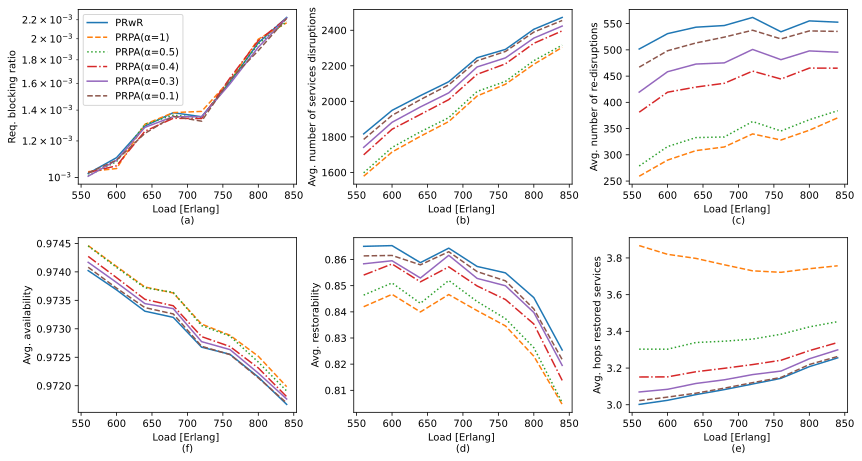

In [3]:
data['env'].plot_formats = ['svg', 'pdf']
plots.plot_final_results(data['env'], data['results'], None, timedelta=data['timedelta'], show=True)

In [4]:
results = data['results']
for id_routing_policy, routing_policy in enumerate(results.keys()):
    for id_restoration_policy, restoration_policy in enumerate(results[routing_policy].keys()):
        if any(results[routing_policy][restoration_policy][load][x]['avg_failed_before_services'] > 0 for load in results[routing_policy][restoration_policy].keys() for x in
            range(len(results[routing_policy][restoration_policy][load]))):
            print(restoration_policy, [load for load in results[routing_policy][restoration_policy].keys()],
                            [np.mean([results[routing_policy][restoration_policy][load][x]['avg_failed_before_services'] for x in
                                    range(len(results[routing_policy][restoration_policy][load]))]) for
                            load in results[routing_policy][restoration_policy].keys()])

PRwR [560, 600, 640, 680, 720, 760, 800, 840] [501.61, 530.91, 543.22, 546.37, 561.8, 534.43, 555.2, 552.78]
PRPA(α=1) [560, 600, 640, 680, 720, 760, 800, 840] [259.21, 289.91, 308.0, 314.93, 339.83, 328.18, 346.85, 370.49]
PRPA(α=0.5) [560, 600, 640, 680, 720, 760, 800, 840] [278.68, 315.67, 332.8, 333.99, 363.45, 345.38, 366.88, 384.02]
PRPA(α=0.4) [560, 600, 640, 680, 720, 760, 800, 840] [381.19, 419.3, 429.1, 436.27, 459.53, 444.44, 465.25, 465.13]
PRPA(α=0.3) [560, 600, 640, 680, 720, 760, 800, 840] [419.42, 458.34, 472.96, 475.2, 500.79, 481.31, 497.99, 495.58]
PRPA(α=0.1) [560, 600, 640, 680, 720, 760, 800, 840] [467.04, 498.3, 513.12, 524.26, 537.44, 520.84, 536.11, 535.16]


In [5]:
data['args'].topology_file = "Coronet.txt"

In [6]:
# reading the topology
topology = graph.get_topology(data['args'])
topology = graph.get_dcs(data['args'], topology)
topology = graph.get_ksp(data['args'], topology)

plt.figure()
plt.axis('off')
pos = nx.get_node_attributes(topology, 'pos')

nx.draw_networkx_edges(topology, pos)

# using scatter rather than nx.draw_networkx_nodes to be able to have a legend in the topology
nodes_x = [pos[x][0] for x in topology.graph['source_nodes']]
nodes_y = [pos[x][1] for x in topology.graph['source_nodes']]
plt.scatter(nodes_x, nodes_y, label='Node', color='blue', alpha=1., marker='o', linewidths=1., edgecolors='black', s=160.)

nodes_x = [pos[x][0] for x in topology.graph['dcs']]
nodes_y = [pos[x][1] for x in topology.graph['dcs']]
plt.scatter(nodes_x, nodes_y, label='DC', color='red', alpha=1., marker='s', linewidths=1., edgecolors='black', s=200.)

plt.legend(loc=1)

plt.savefig(f'./results/{data["env"].output_folder}/topology_{data["env"].topology_name}.svg')
plt.show()
plt.close() # avoids too many figures opened at once

from IPython.display import display, SVG
display(SVG(f'./results/{data["env"].output_folder}/topology_{data["env"].topology_name}.svg'))

ParseError: syntax error: line 1, column 0 (<string>)